Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
df_rentapts = pd.read_csv('rent_apts.csv')
df_rentapts.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


Exploring the dataset

In [3]:
#Shape of the dataset, rows and columns respectively.
df_rentapts.shape

(1848, 7)

In [4]:
df_rentapts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [5]:
#we see that the dataset contains 1848 entries, 
#the bathrooms column has some null values but we shall deal with that later
df_rentapts.columns
#we can see that there are 3 columns with missing values
df_rentapts.isnull().sum()

Agency            0
Neighborhood      0
Price             0
link              0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [6]:
#the bathroom column has 291 missing values but we shall deal with it later

#describe the data
df_rentapts.describe().T

,count,mean,std,min,25%,50%,75%,max
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


# Data cleaning and wrangling

In [7]:
#the price column is an object type, we shall convert it to float
#first we shall remove the KSh sign and the comma (KSh 50,000)
df_rentapts['Price'].str.replace('KSh','',regex=True).str.replace(',','')

0        155000
1        100000
2         75000
3        135000
4         50000
         ...   
1843     180000
1844     180000
1845     180000
1846     180000
1847     180000
Name: Price, Length: 1848, dtype: object

In [8]:
df_rentapts['Price'] = df_rentapts['Price'].str.replace('KSh','',regex=True).str.replace(',','').astype(float)

In [9]:
df_rentapts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   float64
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(4), object(3)
memory usage: 101.2+ KB


In [10]:
#Check for null values
df_rentapts.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1848.0,97343.881494,40241.322051,12000.0,70000.0,95000.0,130000.0,280000.0
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


<Axes: >

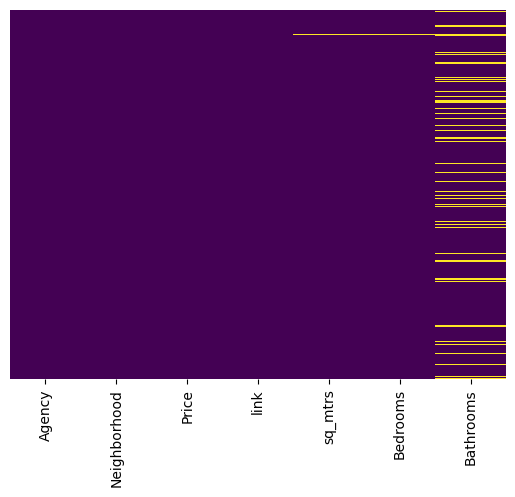

In [11]:
sns.heatmap(df_rentapts.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df_rentapts.dropna(subset=['sq_mtrs','Bedrooms'],inplace=True)
df_rentapts.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [13]:
#check for houses that have missing bathrooms as null values
df_rentapts[df_rentapts['Bathrooms'].isnull()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands",150000.0,/listings/furnished-2-bedroom-apartment-for-re...,2.0,2.0,NaN
8,Pmc Estates Limited,"Thika Road, Thika Road",85000.0,/listings/4-bedroom-apartment-for-rent-thika-r...,4.0,4.0,NaN
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,NaN
36,Cfs Homes,"Ruaka, Kiambaa",16000.0,/listings/1-bedroom-apartment-for-rent-ruaka-3...,1.0,1.0,NaN
...,...,...,...,...,...,...,...
1817,Capstone Properties,"General Mathenge, Westlands",175000.0,/listings/3-bedroom-apartment-for-rent-general...,3.0,3.0,NaN
1820,Cloud Real Estate,"General Mathenge, Westlands",175000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,NaN
1833,Rainbow Properties Limited,"State House, Dagoretti North",180000.0,/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,NaN
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000.0,/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,NaN


In [14]:
#we see the bathroom column has a good correlation with the price column
#We shall group the houses by the number of bedrooms and fill the missing values
#with the mean of the bathrooms in each group, rounded to whole numbers
df_rentapts.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

0       4.0
1       4.0
2       5.0
3       4.0
4       3.0
       ... 
1843    3.0
1844    2.0
1845    5.0
1846    4.0
1847    2.0
Name: Bathrooms, Length: 1845, dtype: float64

In [15]:
df_rentapts['Bathrooms'] = df_rentapts.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

In [16]:
#check for missing values
df_rentapts.isnull().sum()

Agency          0
Neighborhood    0
Price           0
link            0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

In [17]:
#Notice that we won't need some of the columns to train our model; those are Agency, Neighborhood, and links.
#You also notice that sq_mtrs column is not correlated with any of the columns in our data.
#Remove non-required columns
del df_rentapts["Agency"]
del df_rentapts["link"] 

# Visualising the data




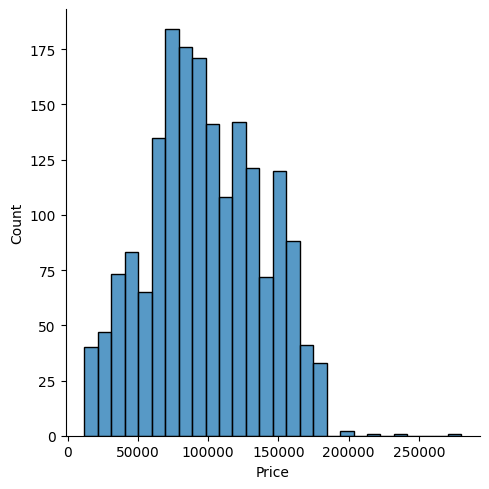

In [18]:
#Visualize the data
#Lets first check the distribution of the price column
sns.displot(df_rentapts['Price'])

In [19]:
#we can see that the price column is right skewed
#lets check the houses that are outliers (200000 and above))
df_rentapts[df_rentapts['Price']>=200000]

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
14,"Riverside Drive, Riverside, Westlands",220000.0,3.0,3.0,3.0
34,"General Mathenge, Westlands",200000.0,3.0,3.0,3.0
64,"Riverside, Westlands",280000.0,3.0,3.0,3.0
94,"Muringa Road, Kilimani, Dagoretti North",200000.0,240.0,5.0,5.0
158,"Kiambere Road, Upper Hill, Langata",240000.0,3.0,3.0,2.0


<Axes: xlabel='sq_mtrs', ylabel='Price'>

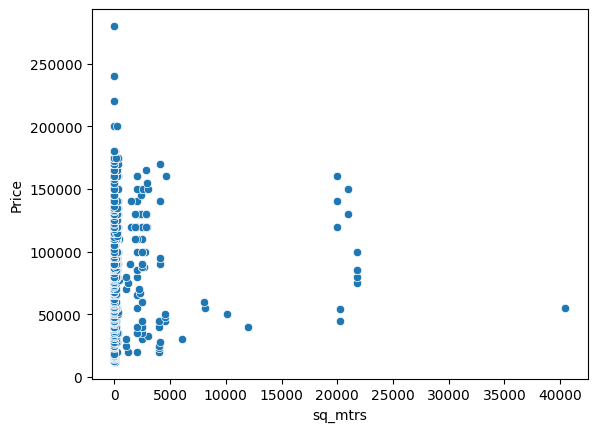

In [20]:
#Notice that the houses that are outliers are somehow in the same area
#sns scatterplot
sns.scatterplot(x='sq_mtrs',y='Price',data=df_rentapts)

<Axes: xlabel='Bedrooms', ylabel='Price'>

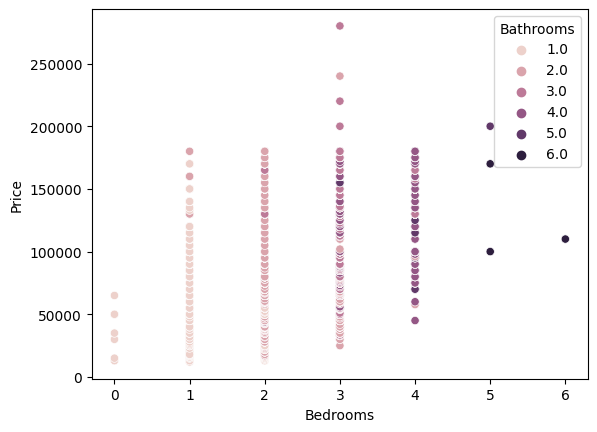

In [21]:
#scatterplot for price  and bedrooms colored by bathrooms
sns.scatterplot(x='Bedrooms',y='Price',data=df_rentapts,hue='Bathrooms')

<Axes: xlabel='sq_mtrs', ylabel='Price'>

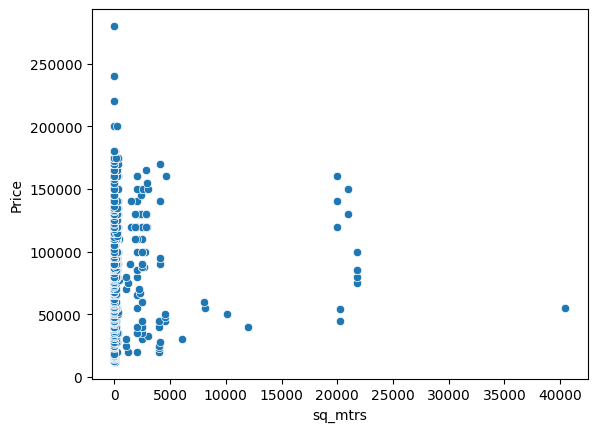

In [22]:
#we notice that the houses  are expensive when they have more bedrooms and bathrooms
#Lets check the scatterplot of the sq_mtrs column with price
sns.scatterplot(x='sq_mtrs',y='Price',data=df_rentapts)

In [23]:
#check for houses with less than 100 sq_mtrs
df_rentapts[df_rentapts['sq_mtrs']<100]

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,"General Mathenge, Westlands",155000.0,4.0,4.0,4.0
2,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,3.0,3.0,5.0
4,"Imara Daima, Embakasi",50000.0,3.0,3.0,3.0
5,"Waiyaki Way, Westlands",150000.0,2.0,2.0,2.0
6,"Off Denis Pritt, Kilimani, Dagoretti North",100000.0,14.0,2.0,3.0
...,...,...,...,...,...
1843,"Laikipia Road, Kileleshwa, Dagoretti North",180000.0,3.0,3.0,3.0
1844,"Peponi road, Spring Valley, Westlands",180000.0,2.0,2.0,2.0
1845,"Kileleshwa, Dagoretti North",180000.0,4.0,4.0,5.0
1846,"Westlands Area, Westlands",180000.0,4.0,4.0,4.0


In [24]:
#check for houses with less than 100 sq_mtrs
df_rentapts[df_rentapts['sq_mtrs']==0]

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
16,"Waiyaki Way, Westlands",50000.0,0.0,0.0,1.0
19,"Sports Road, Waiyaki Way, Westlands",13000.0,0.0,0.0,1.0
21,"Ruaka, Kiambaa",13000.0,0.0,0.0,1.0
26,"Kiambu Road, Kiambu Road",15000.0,0.0,0.0,1.0
100,"Kileleshwa, Dagoretti North",30000.0,0.0,0.0,1.0
137,"Denis Pritt, Kilimani, Dagoretti North",35000.0,0.0,0.0,1.0
275,"Waiyaki Way, Westlands",50000.0,0.0,0.0,1.0
462,"Nairobi West, Langata",65000.0,0.0,0.0,1.0


In [25]:
#we notice houses with 0 sq_mtrs, we shall drop them
df_rentapts.drop(df_rentapts[df_rentapts['sq_mtrs']==0].index,inplace=True)

## Conclusion
The houses with more bedrooms and bathrooms are more expensive


In [26]:
df_rentapts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1837 entries, 0 to 1847
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1837 non-null   object 
 1   Price         1837 non-null   float64
 2   sq_mtrs       1837 non-null   float64
 3   Bedrooms      1837 non-null   float64
 4   Bathrooms     1837 non-null   float64
dtypes: float64(4), object(1)
memory usage: 86.1+ KB


<Axes: xlabel='sq_mtrs', ylabel='Price'>

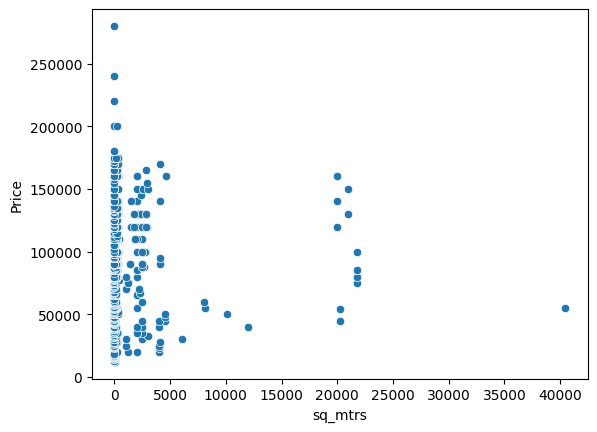

In [27]:
#Lets check the scatterplot of the sq_mtrs column with price
sns.scatterplot(x='sq_mtrs',y='Price',data=df_rentapts)

<Axes: xlabel='sq_mtrs'>

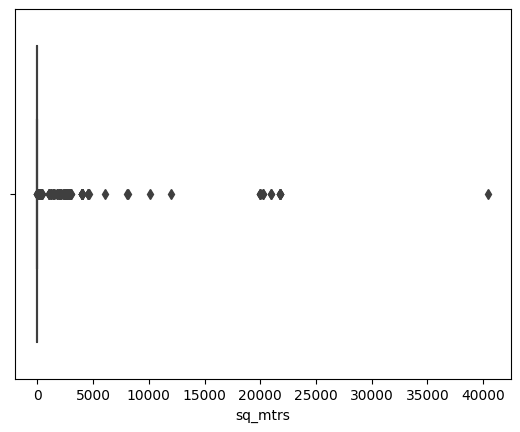

In [28]:
#wee see most are less than 5000 sq_mtrs
#box plot for sq_mtrs
sns.boxplot(x='sq_mtrs',data=df_rentapts)

In [29]:
#we notice that there are outliers, we shall remove them
df_rentapts.drop(df_rentapts[df_rentapts['sq_mtrs']>30000].index,inplace=True)

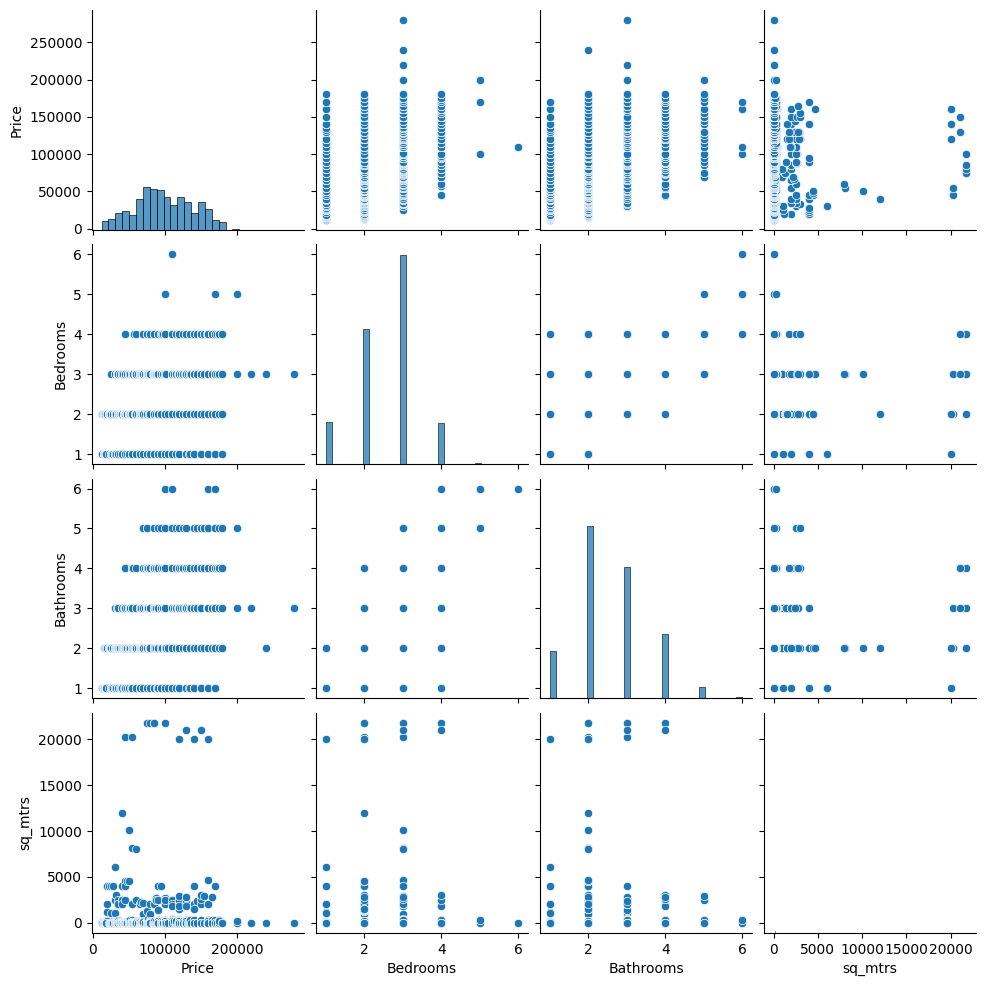

In [30]:
#generate a pairplot on price, bedrooms, bathrooms and sq_mtrs
sns.pairplot(df_rentapts[['Price','Bedrooms','Bathrooms','sq_mtrs']])

In [31]:
#The houses with more bedrooms and bathrooms are more expensive
#The houses with more sq_mtrs are more expensive

In [32]:
#Extract the town from neighborhood column
#for further analysis
df_rentapts['Town'] = df_rentapts['Neighborhood'].str.split(',').str[-1]

In [33]:
#check for the towns
df_rentapts['Town'].nunique()

37

<Axes: xlabel='Town'>

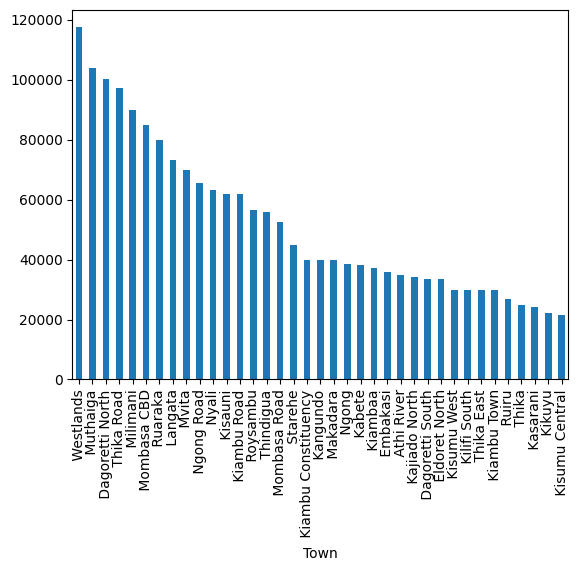

In [34]:
#grouby the towns and get the mean price,plot it
df_rentapts.groupby('Town')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Town'>

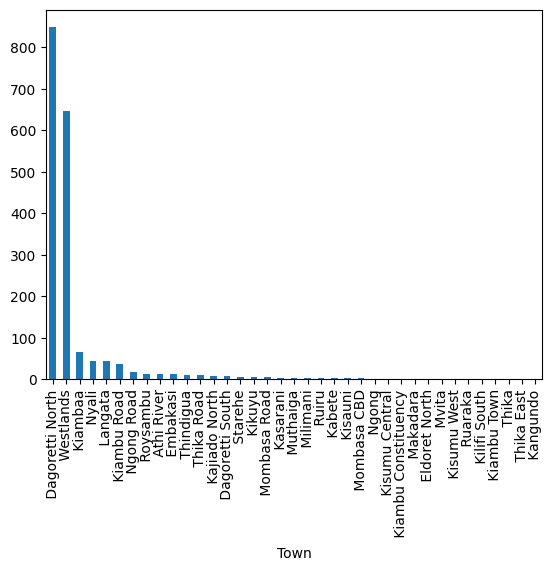

In [35]:
#we notice that the houses in Westlands are the most expensive
#lets also group the town and count the number of houses,\\
df_rentapts.groupby('Town')['Price'].count().sort_values(ascending=False).plot(kind='bar')

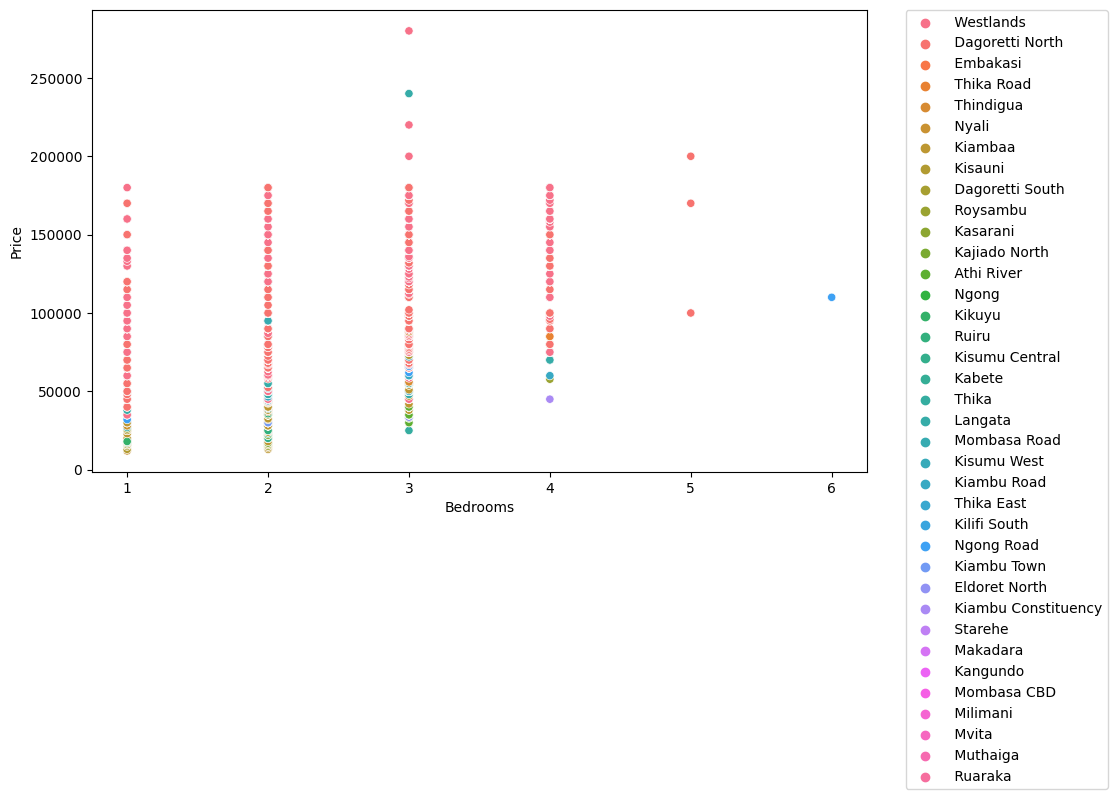

In [36]:
#most houses are in Dagoretti North and Westlands 
#while the least are in Kangundo

#plot a scatterplot of the price and sq_mtrs colored by the town
plt.figure(figsize=(10,6))

sns.scatterplot(x='Bedrooms',y='Price',data=df_rentapts,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [37]:
#Summary
#plt.figure(figsize=(15,12),dpi=180)
#plot without the legend
#sns.scatterplot(x='sq_mtrs',y='Price',data=df_rentapts,hue='Town',legend=False)

In [38]:
#summary
#The houses in Westlands are the most expensive
#The houses in Dagoretti North and Westlands are the most numerous

#Lets check the houses with the most bedrooms
df_rentapts[df_rentapts['Bedrooms']==df_rentapts['Bedrooms'].max()]

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,Town
1164,"Ngong Road, Ngong Road",110000.0,6.0,6.0,6.0,Ngong Road


In [ ]:
df_rentapts = df_rentapts.drop('sq_mtrs', axis=1)